In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg 

In [2]:
# разложение на главные компоненты
# arr - исходный временной ряд
# l - длина обучающей строки (количество уравнений)
# k - длина окна (количество неизвестных)

def ssa_decomposition( arr, l, k):
        
    matrix_h = np.empty( [ l, k ] ) #матрица Ганкеля    
    for i in range( l ):
        for j in range( k ):
            matrix_h[ i, j ] = arr[ i + j ]
            
    mult_matrix_h = np.matmul( matrix_h.T, matrix_h ) 
    eig_value, eig_vector  = linalg.eigh( mult_matrix_h ) 
    matrix_v = np.matmul( matrix_h, eig_vector ) 
              
    return  eig_value, eig_vector, matrix_v

In [75]:
# диагональное усреднение, функция возвращает сглаженный ряд

def diagonal_average( arr ):
    
    l = arr.shape[ 0 ] # количество строк в матрице
    k = arr.shape[ 1 ] # количество столбцов в матрице
    l_ = np.amin( arr.shape ) # минимальное значение между l и k
    k_ = np.amax( arr.shape ) # максимально значение между l и k
    n = np.sum( arr.shape ) - 1 # длина сглаженного ряда
    
    if l < k:
        arr_ = arr
    else:
        arr_ = arr.T
        
    g = np.zeros( [ n ] ) 
    for j in range( n ):
        
        if j < ( l_ - 1 ):
            for m in range( j + 1 ):
                g[ j ] += ( 1/( j + 1 ) )*arr_[ m, j - m ]
        
        elif ( l_ - 1 ) <= j < k_:
            for m in range( l_ ):
                g[ j ] += ( 1/l_ )*arr_[ m, j - m ]
        
        elif  k_ <= j < n:
            for m in range( ( j - k_ + 1 ) , ( n - k_ + 1 ) ):
                g[ j ] += ( 1/( n - j ) )*arr_[ m, j - m ]
          
    return g         

In [99]:
# функция возвращает массив главных компонент

def main_components( arr ):
    
    l = int( len( arr )*0.8 )
    k = len( arr ) - l + 1
    component = np.zeros( [ k, k + l - 1 ] ) 
    eig_value, eig_vector, matrix_v = ssa_decomposition( arr, l, k )
    
    for i in range( k ):
        x = np.zeros( [ l, k ] )
        x = np.outer( matrix_v[:, i], eig_vector[:, i].T)
        component[ i ] = diagonal_average( x )

    return component

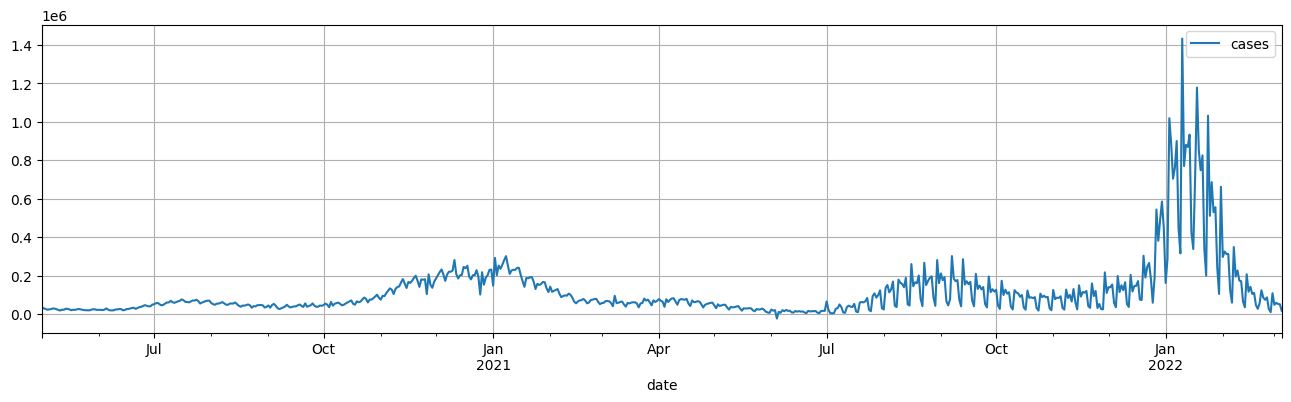

In [120]:
data = pd.read_csv('covid_usa.csv', index_col=[0],  parse_dates=[0])

data.plot(figsize=(16, 4), grid=True)
plt.show()

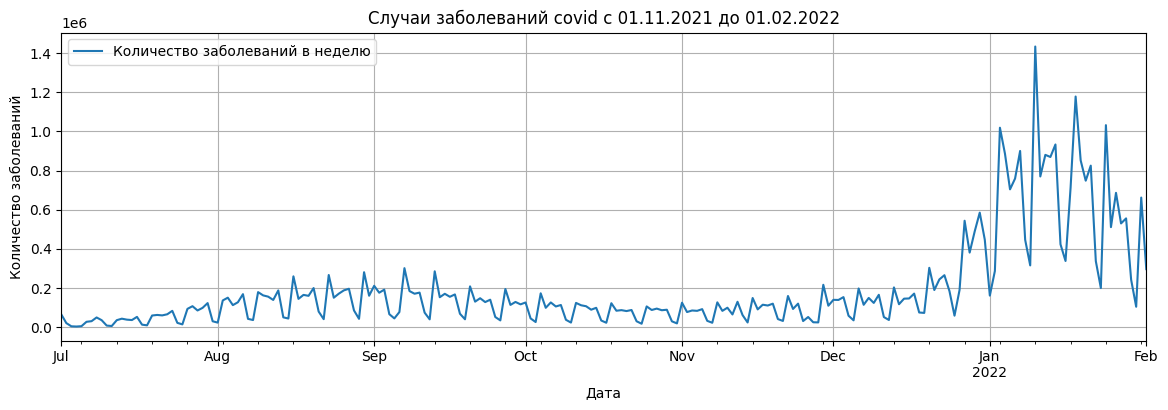

In [121]:
data = data['2021-07-01':'2022-02-01']
data.plot(figsize=(14,4), 
                               grid=True, 
                               xlabel='Дата',
                               ylabel='Количество заболеваний',
                               title='Случаи заболеваний covid с 01.11.2021 до 01.02.2022')
plt.legend(['Количество заболеваний в неделю'])
plt.show()

In [122]:
arr_data = data.iloc[:, 0].to_numpy()
l = int(len(arr_data)*0.90)
k = len(arr_data) - l + 1

eig_value, eig_vector, matrix_v = ssa_decomposition(arr_data, l, k)
eig_value[-10:]

array([1.52808381e+12, 1.76833981e+12, 2.91610298e+12, 3.14560618e+12,
       8.34421353e+12, 8.76968647e+12, 1.04096248e+13, 1.11956524e+13,
       1.68048069e+13, 3.01003606e+14])

Компонента 0


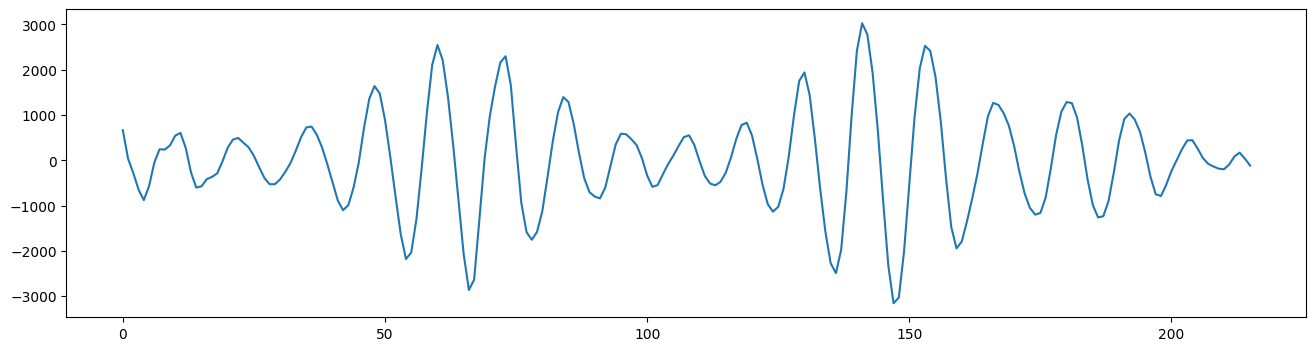

Компонента 1


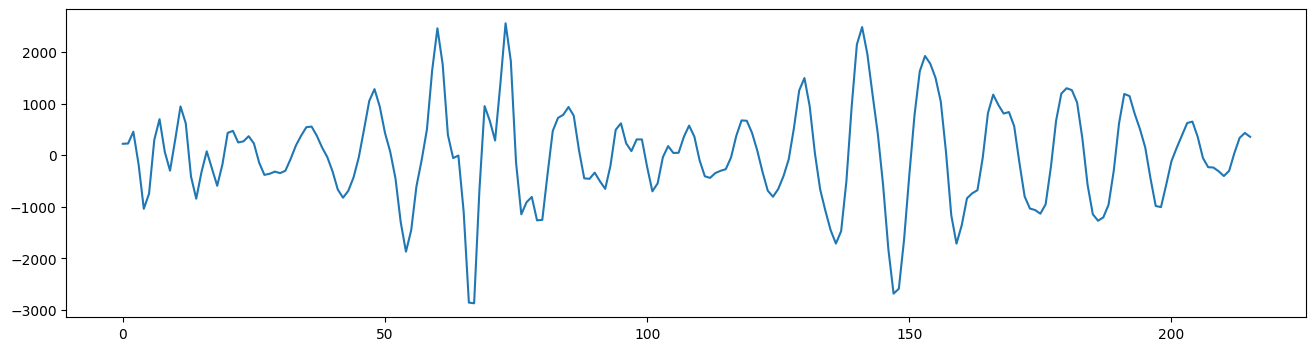

Компонента 2


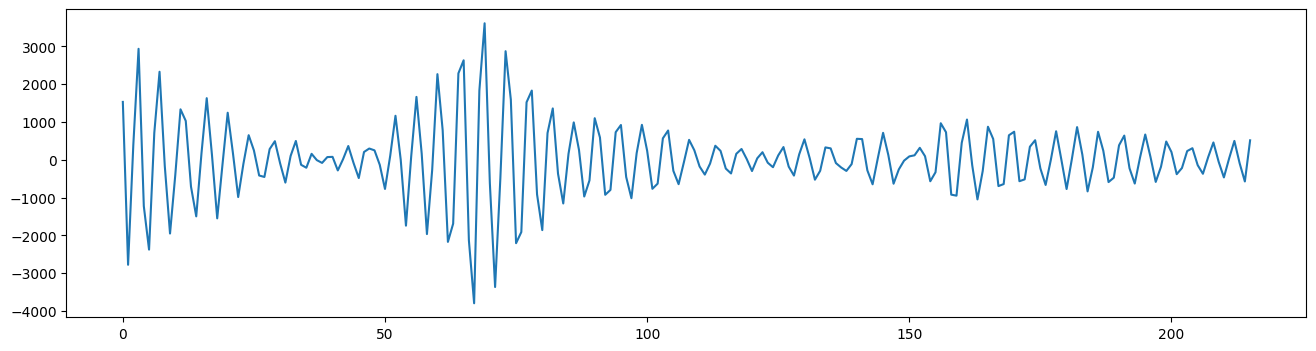

Компонента 3


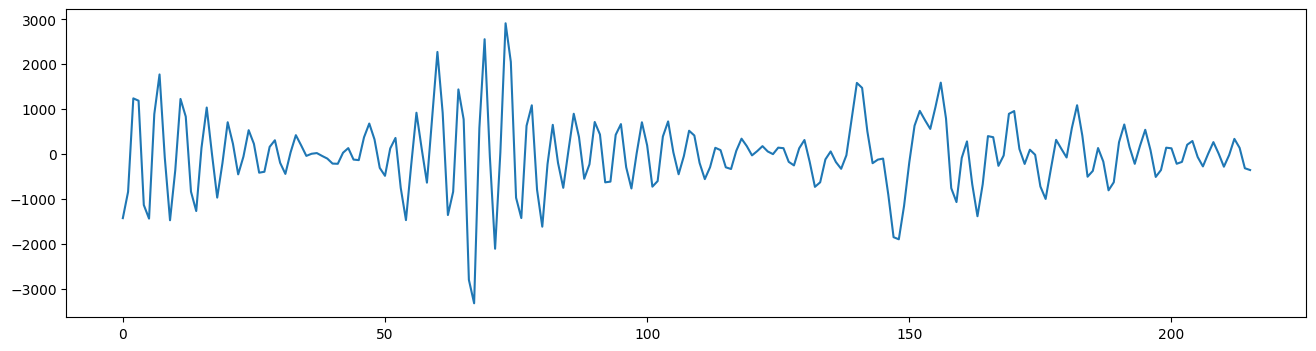

Компонента 4


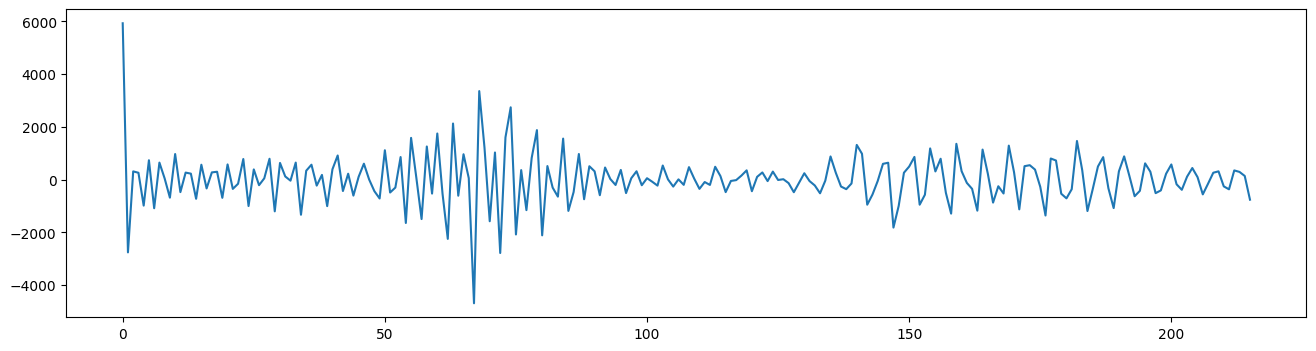

Компонента 5


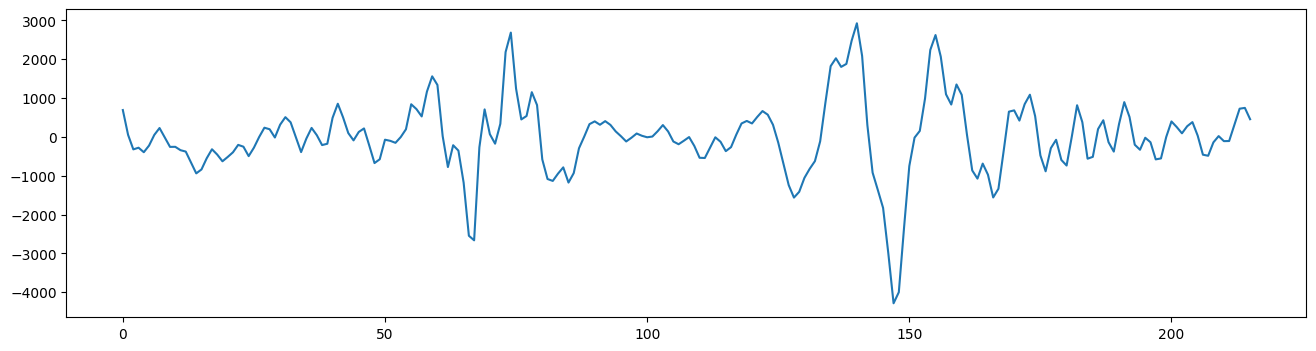

Компонента 6


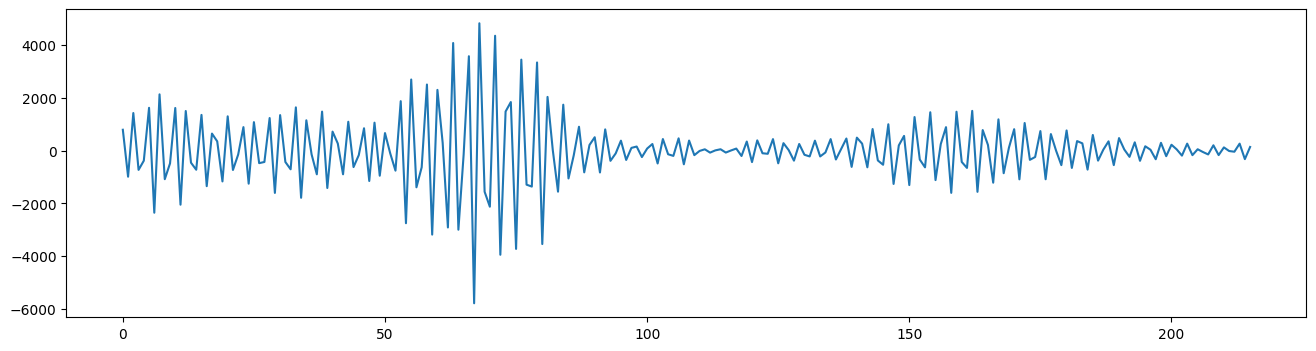

Компонента 7


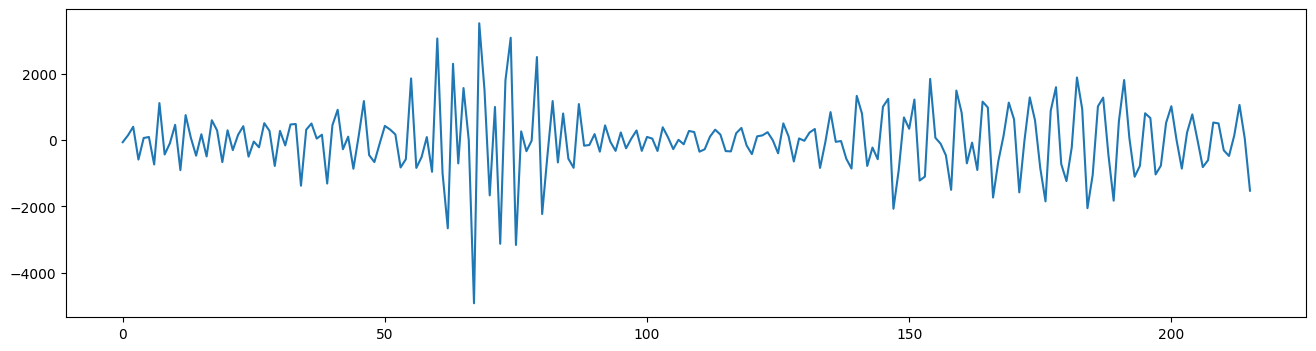

Компонента 8


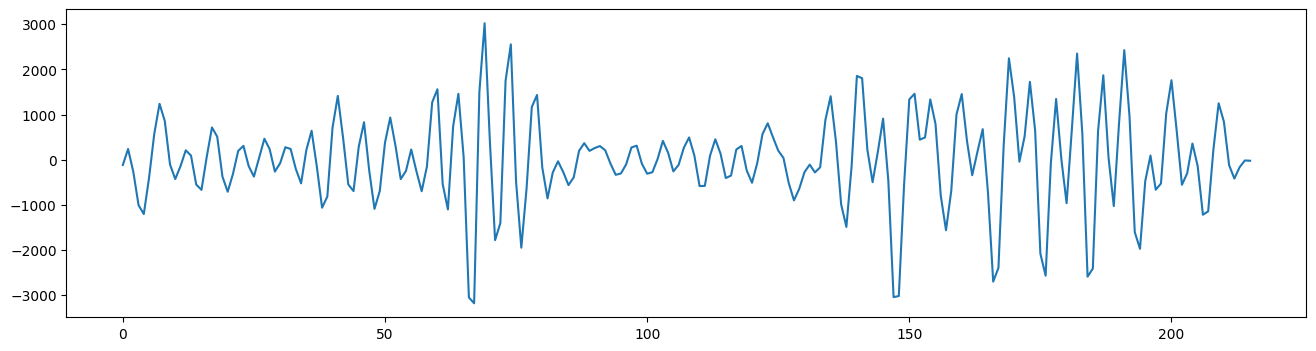

Компонента 9


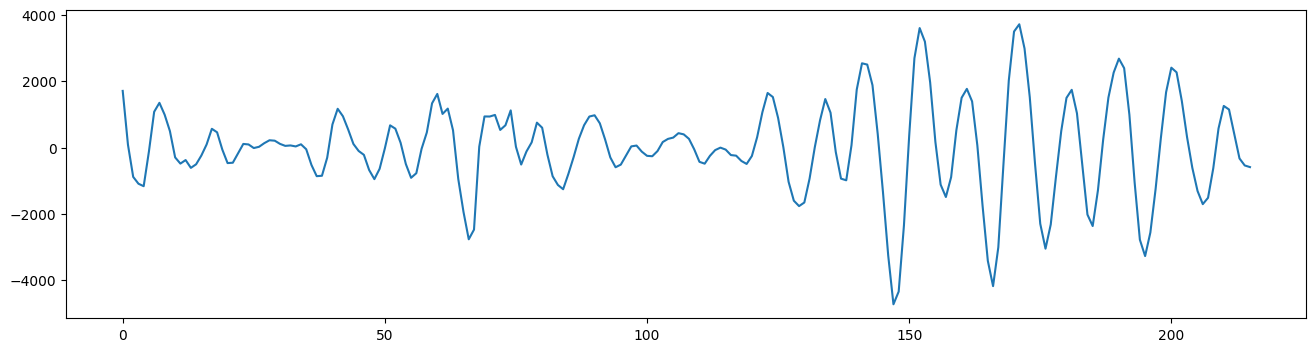

Компонента 10


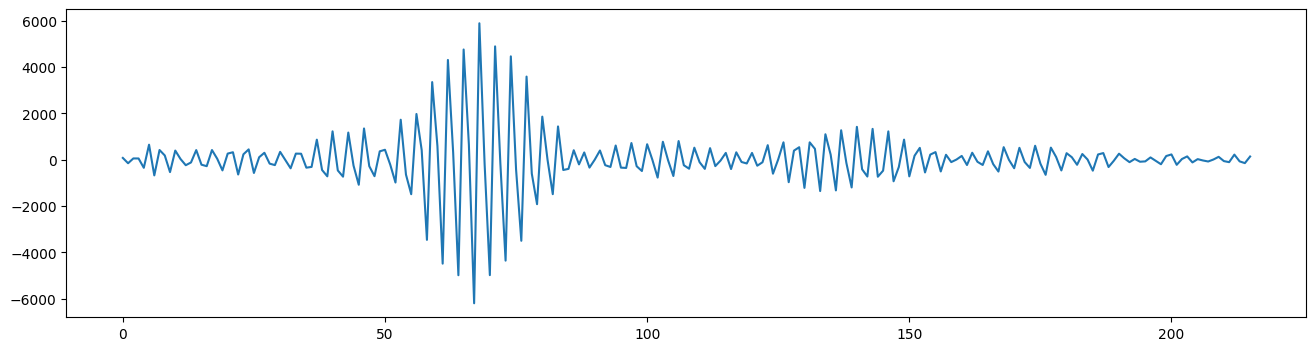

Компонента 11


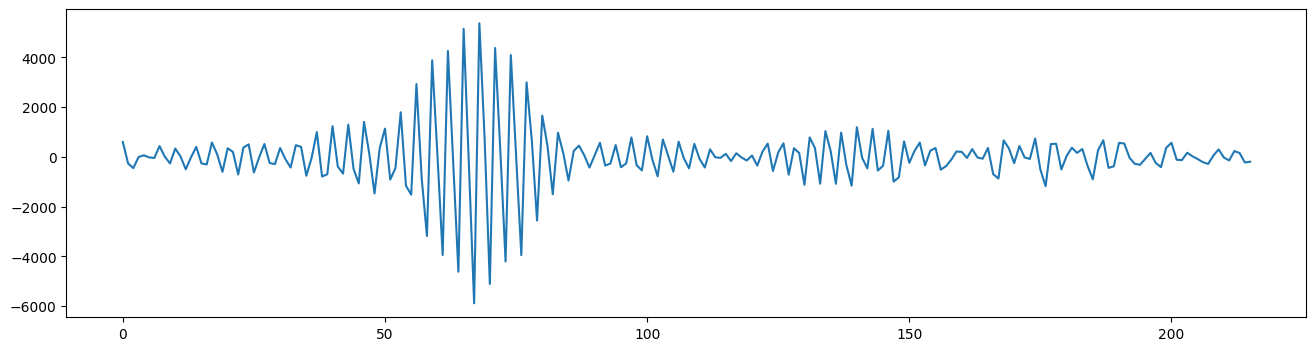

Компонента 12


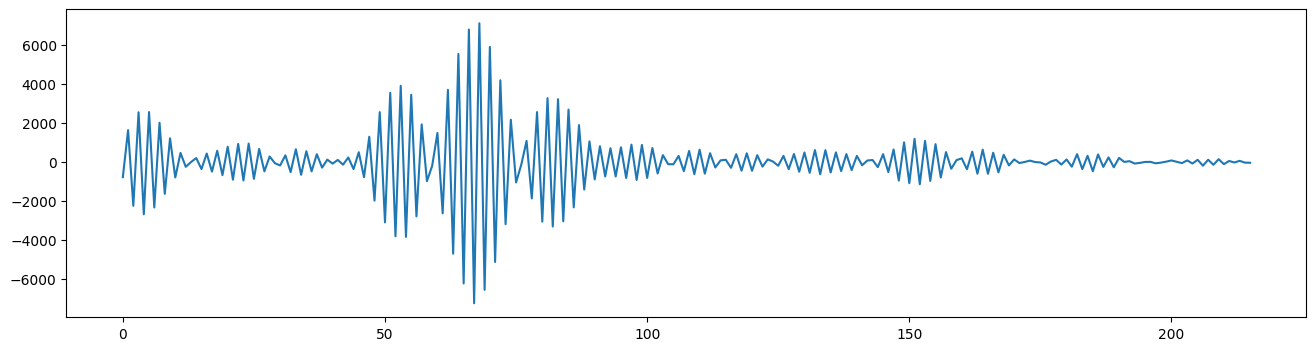

Компонента 13


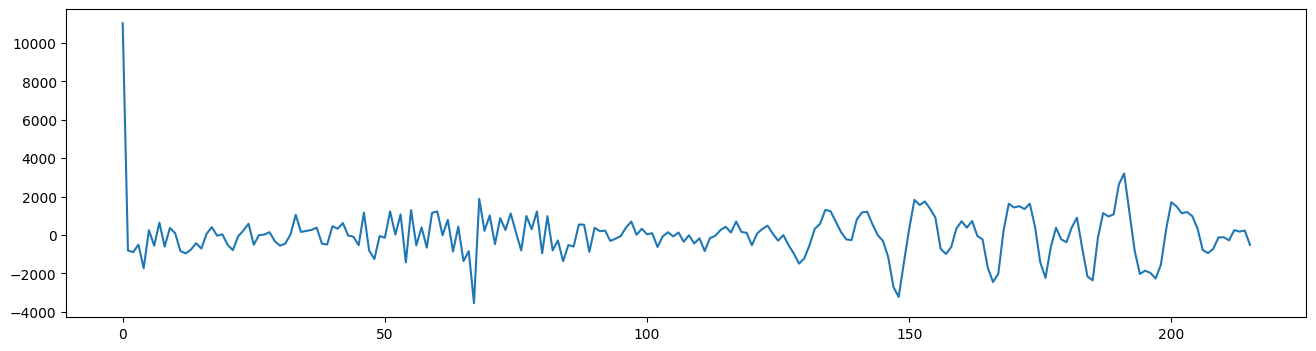

Компонента 14


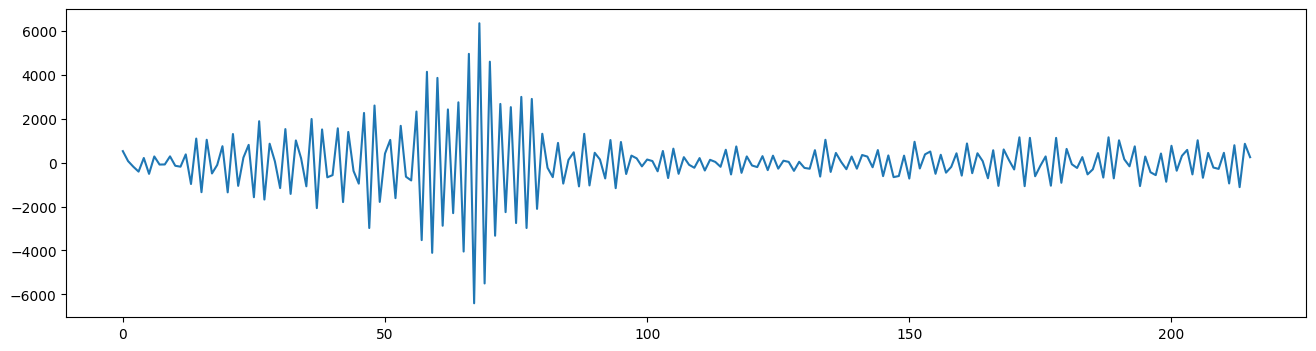

Компонента 15


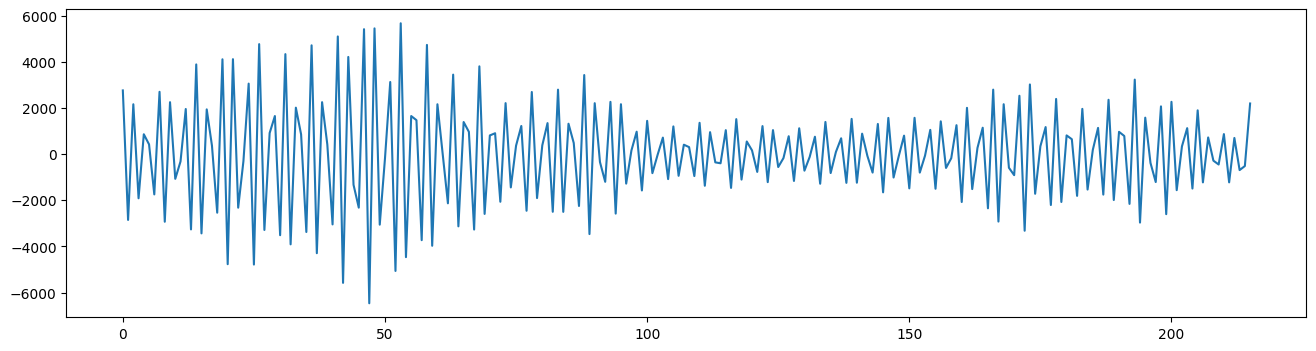

Компонента 16


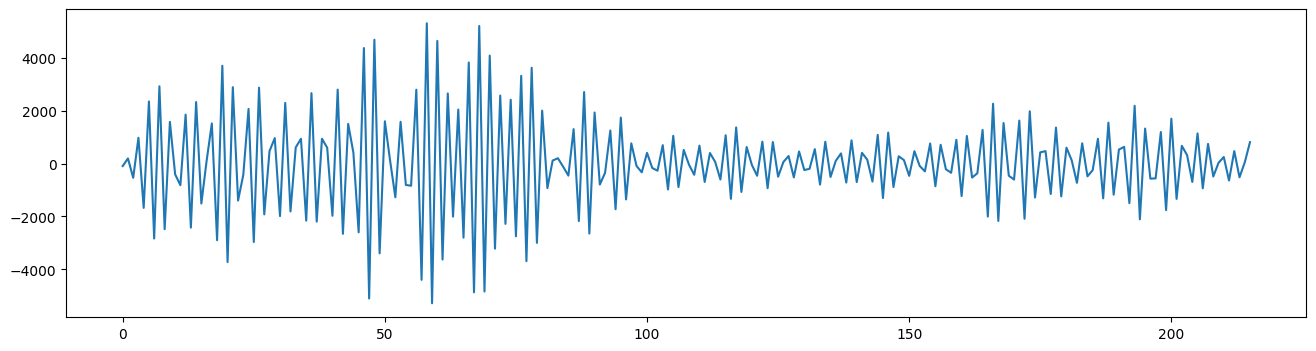

Компонента 17


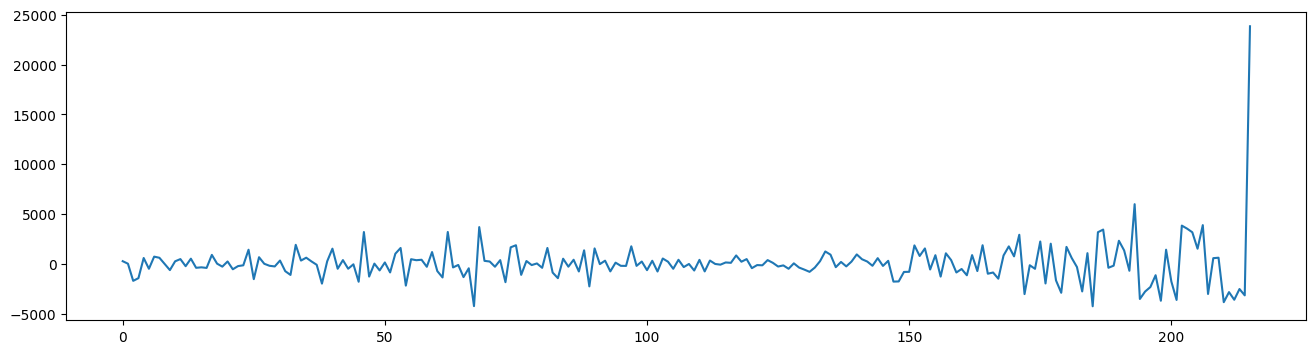

Компонента 18


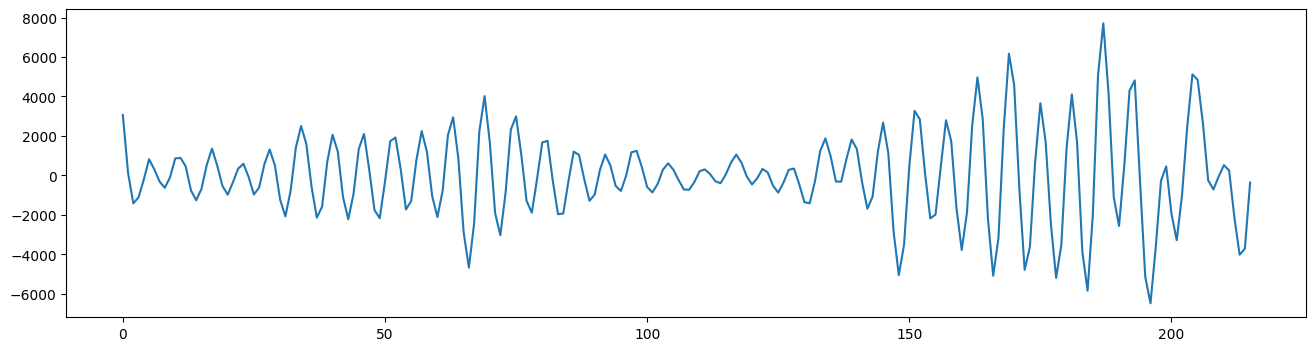

Компонента 19


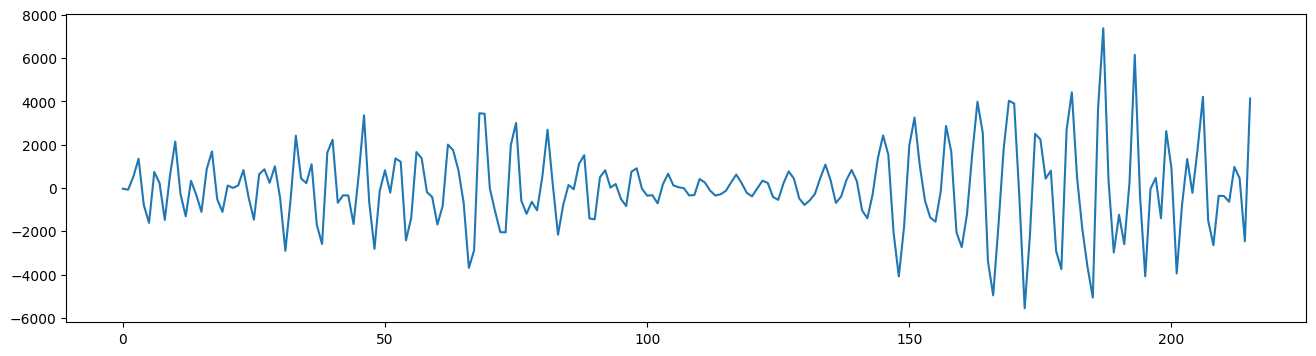

Компонента 20


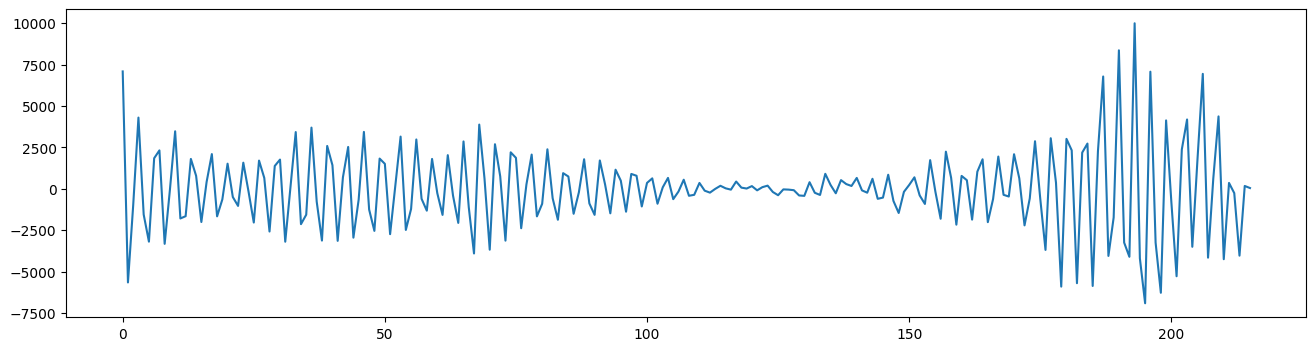

Компонента 21


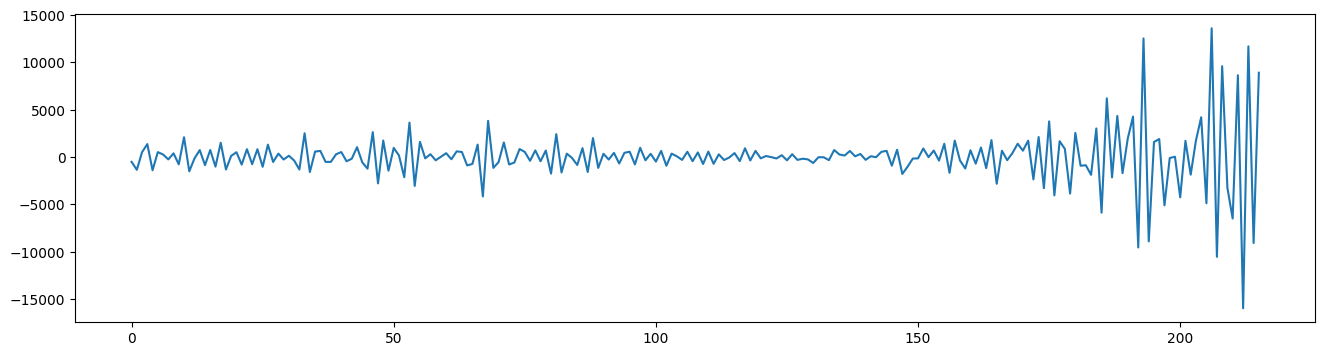

Компонента 22


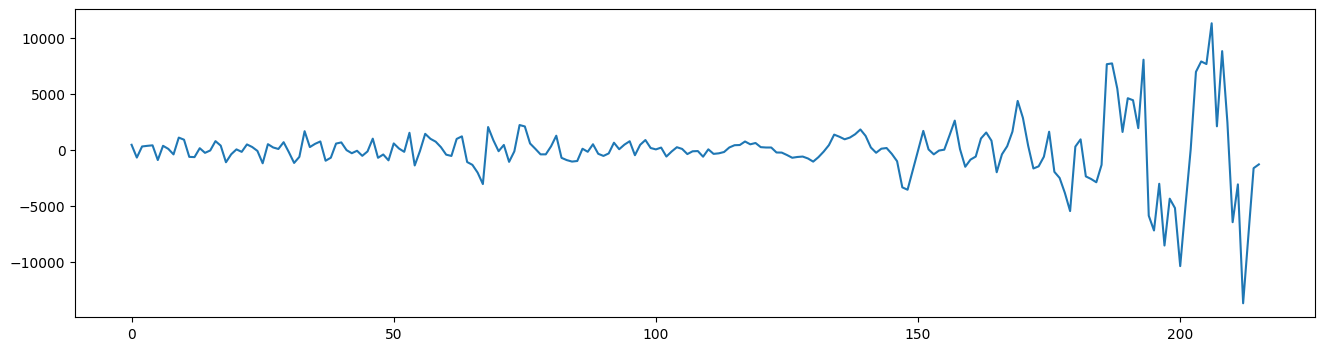

Компонента 23


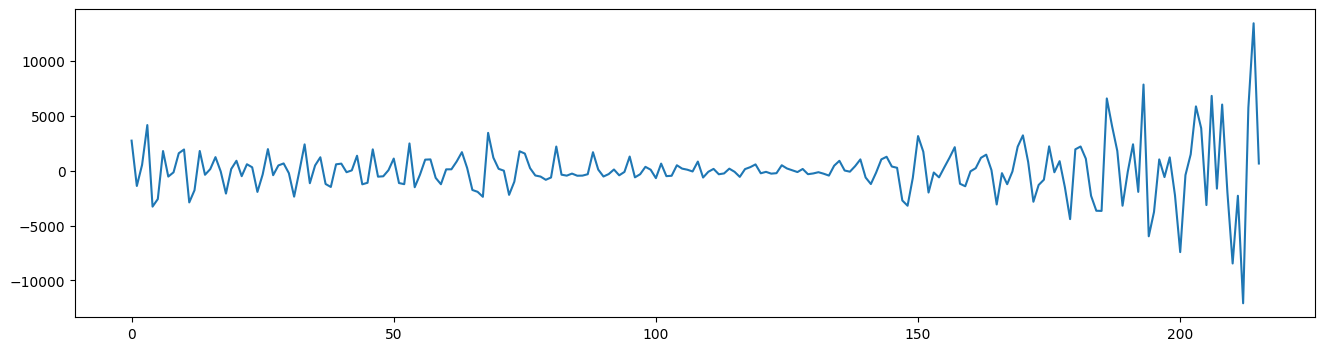

Компонента 24


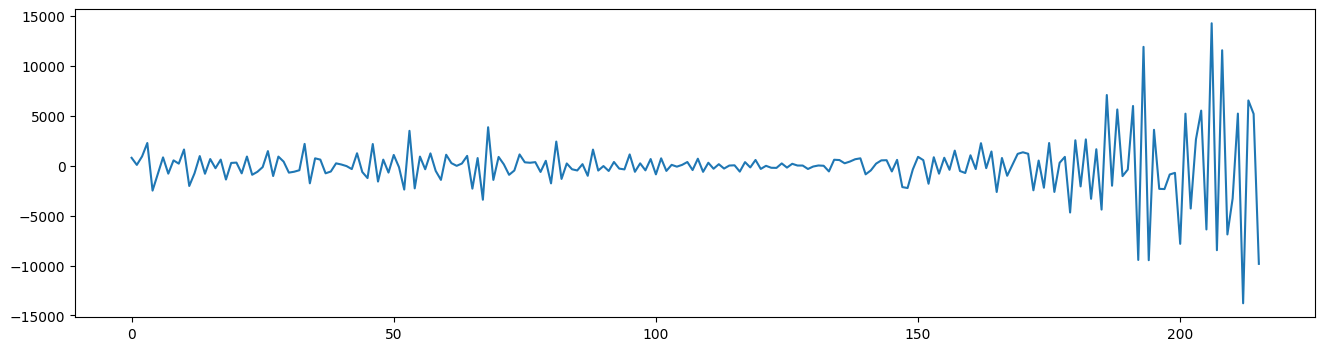

Компонента 25


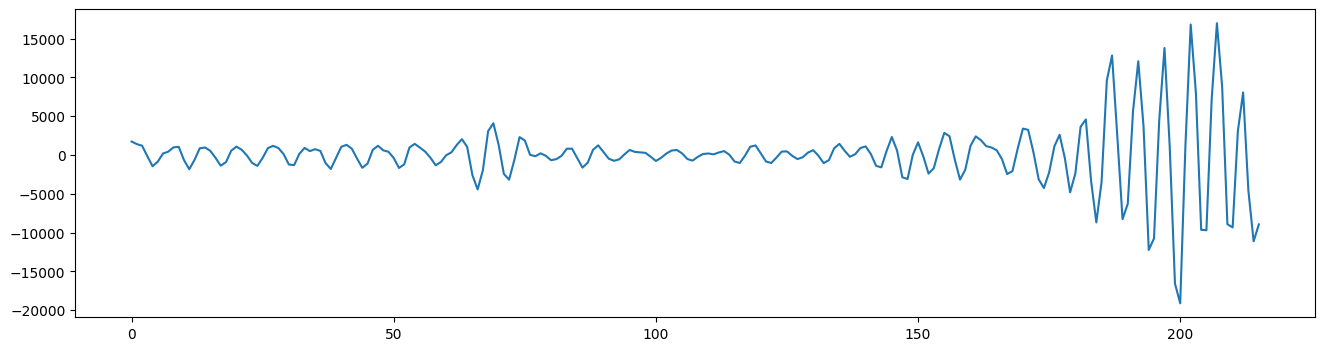

Компонента 26


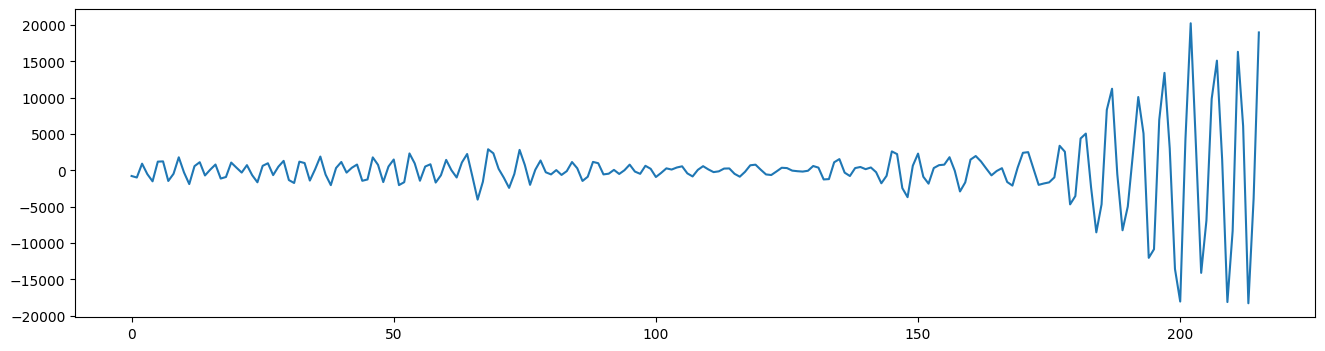

Компонента 27


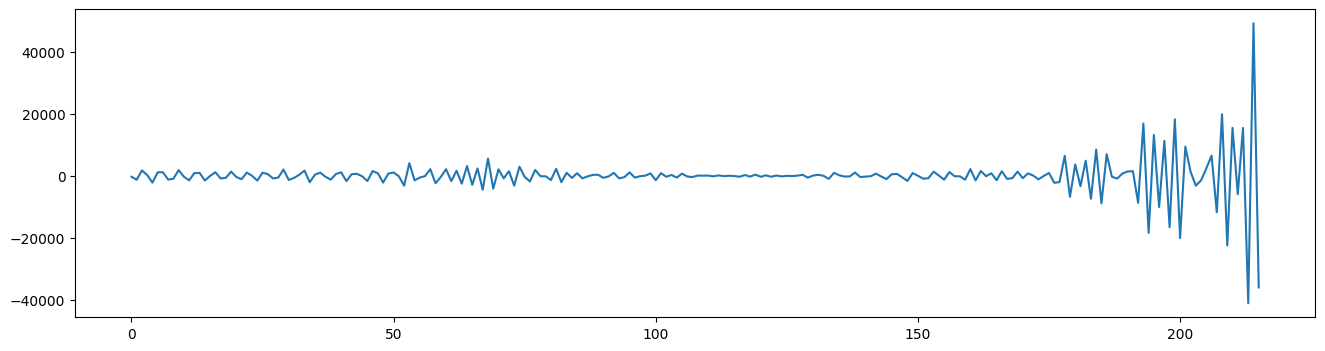

Компонента 28


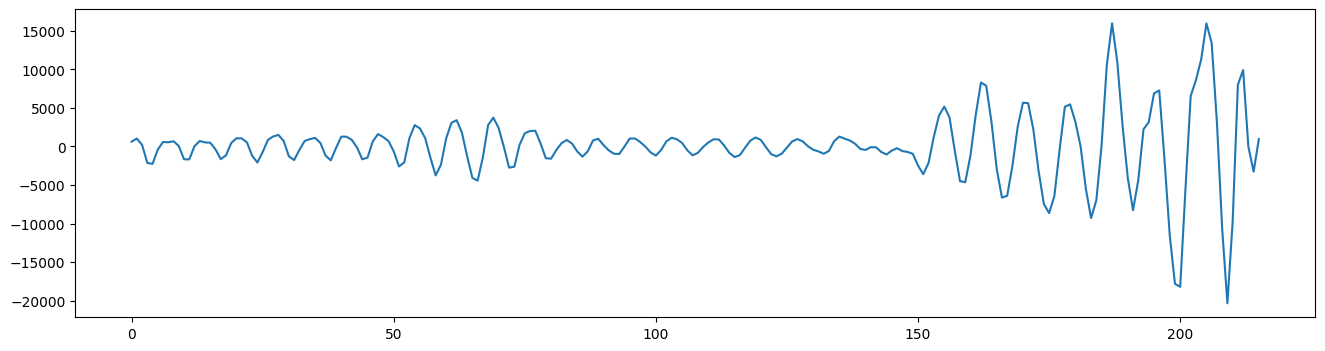

Компонента 29


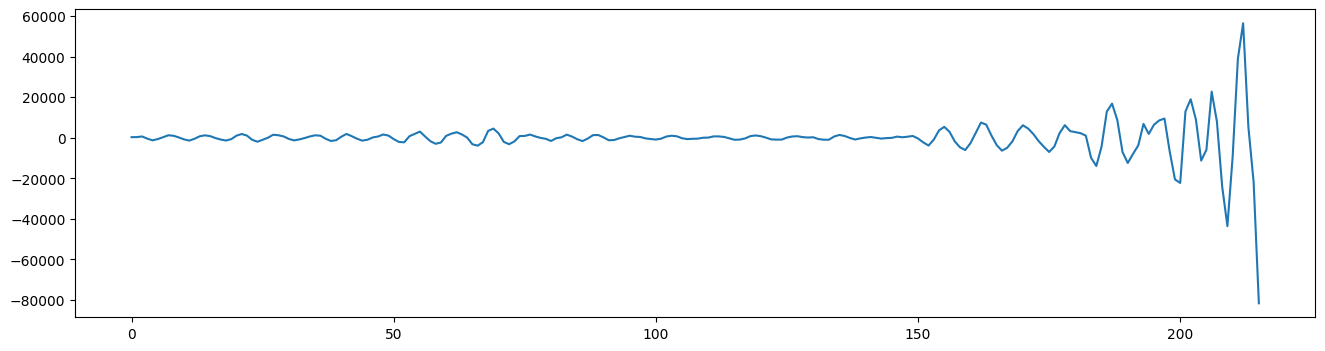

Компонента 30


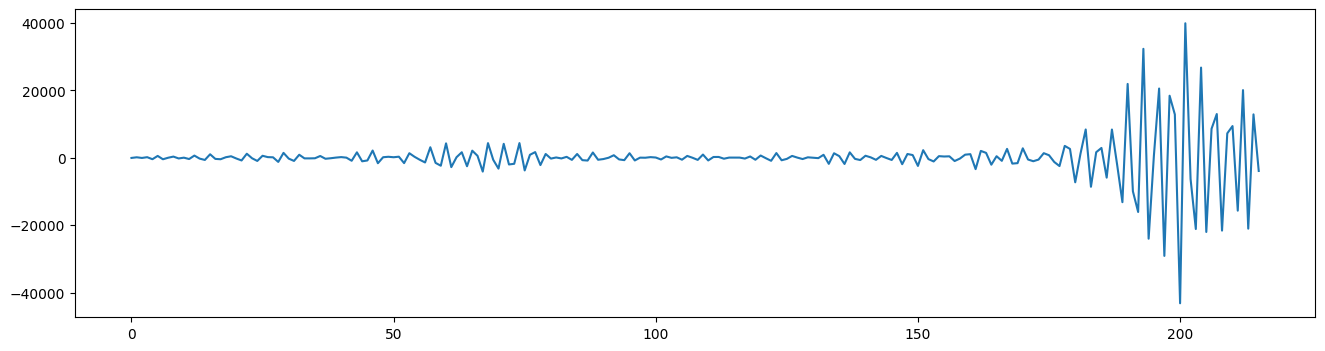

Компонента 31


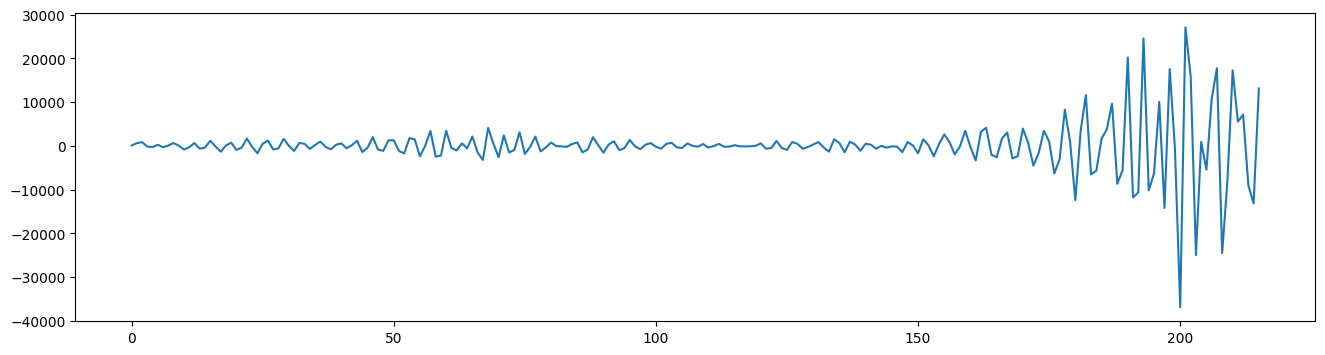

Компонента 32


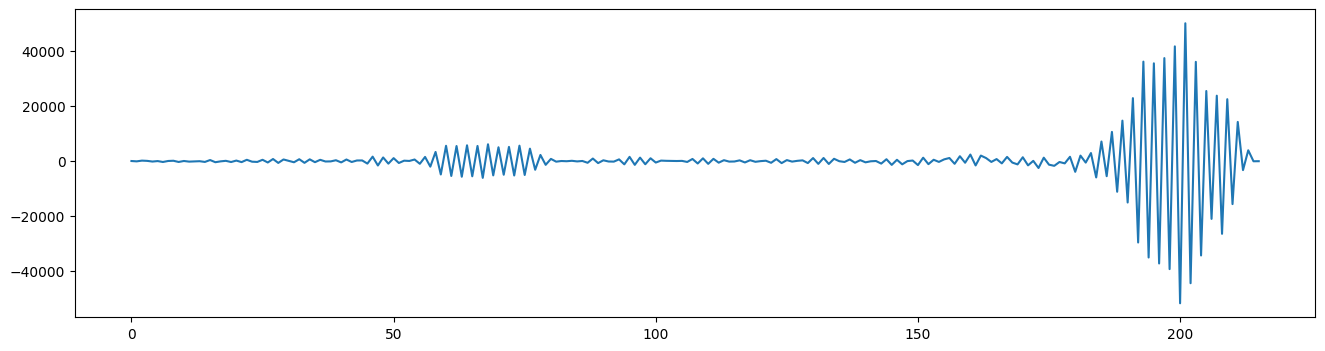

Компонента 33


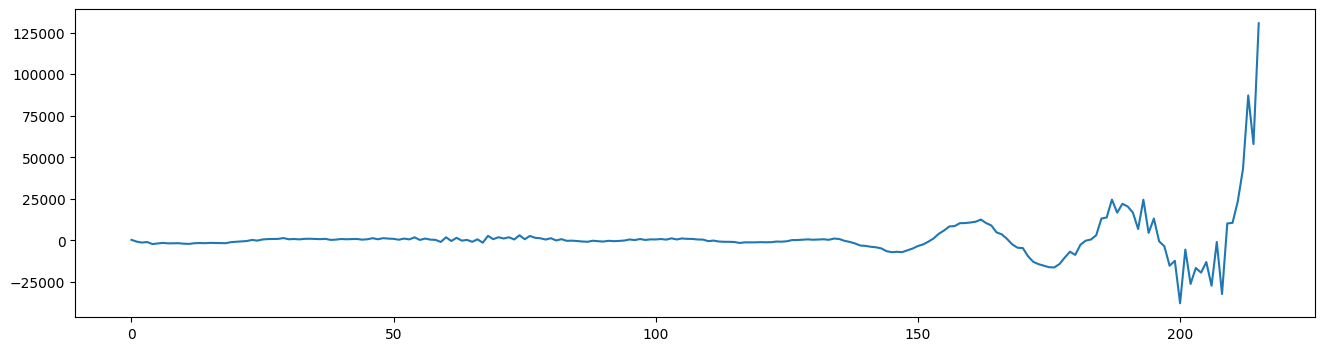

Компонента 34


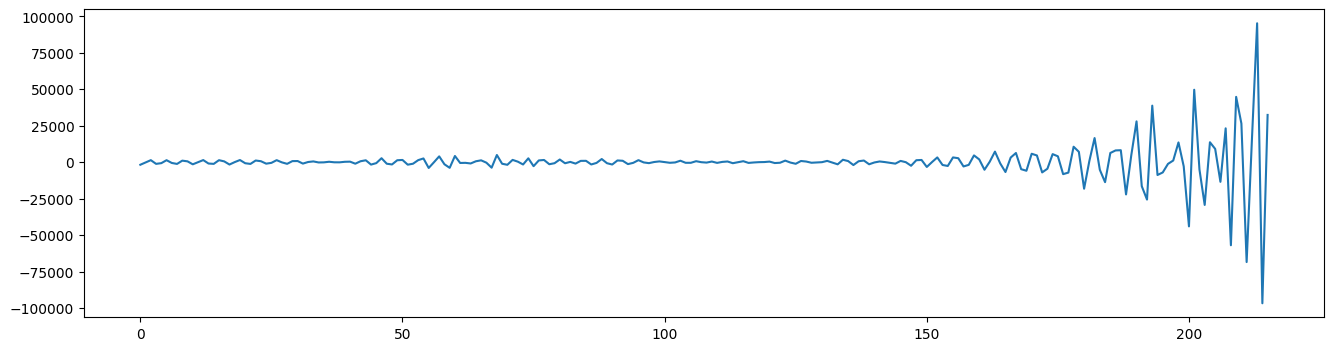

Компонента 35


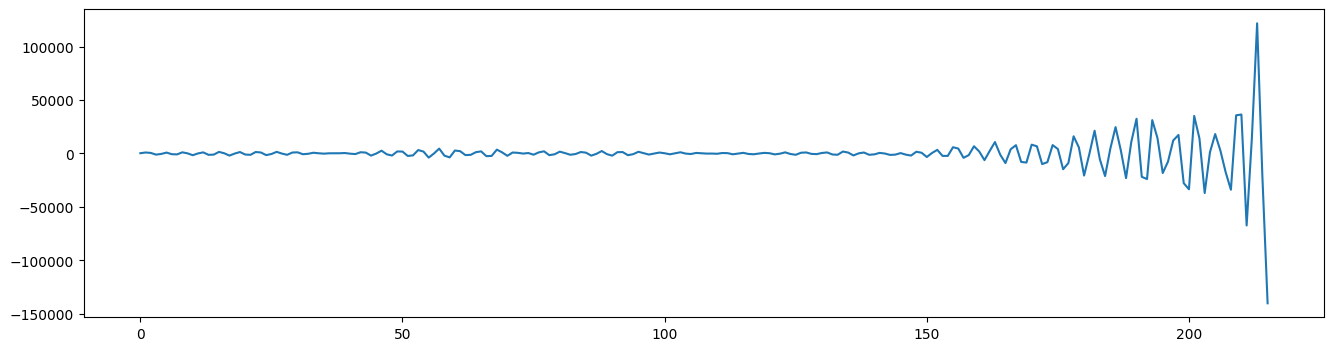

Компонента 36


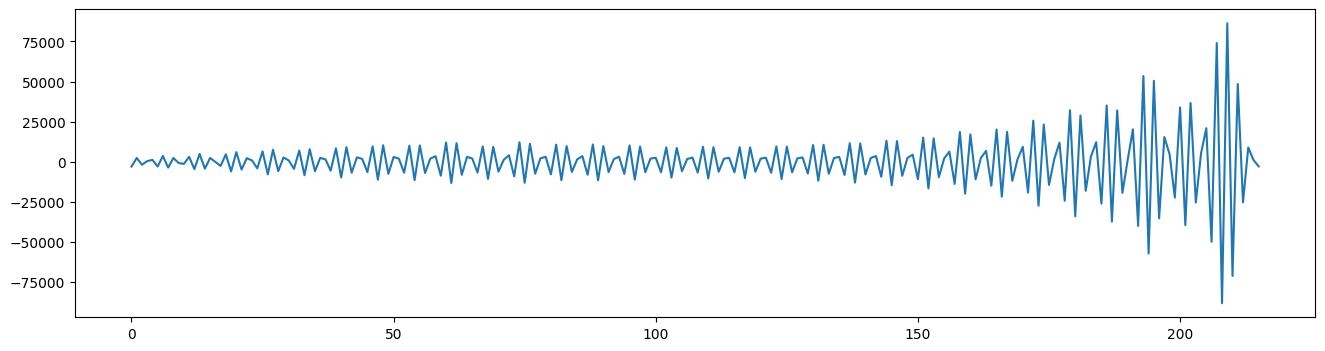

Компонента 37


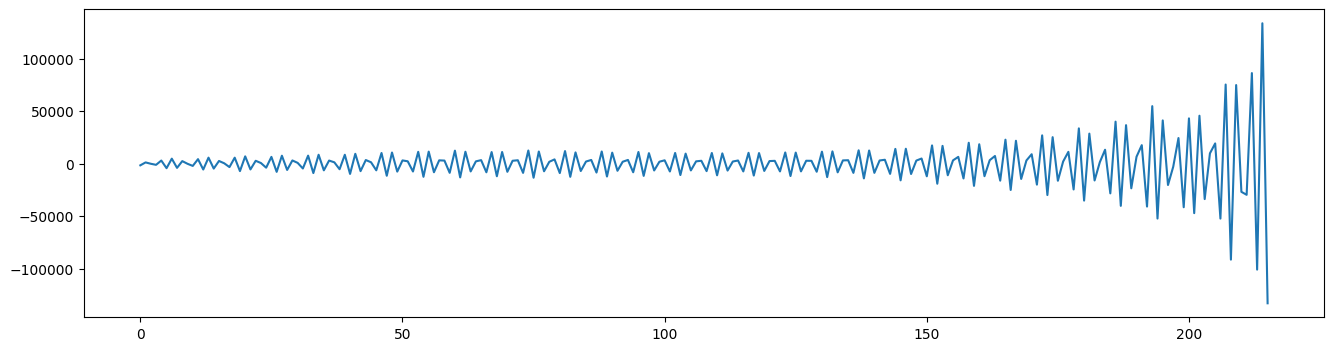

Компонента 38


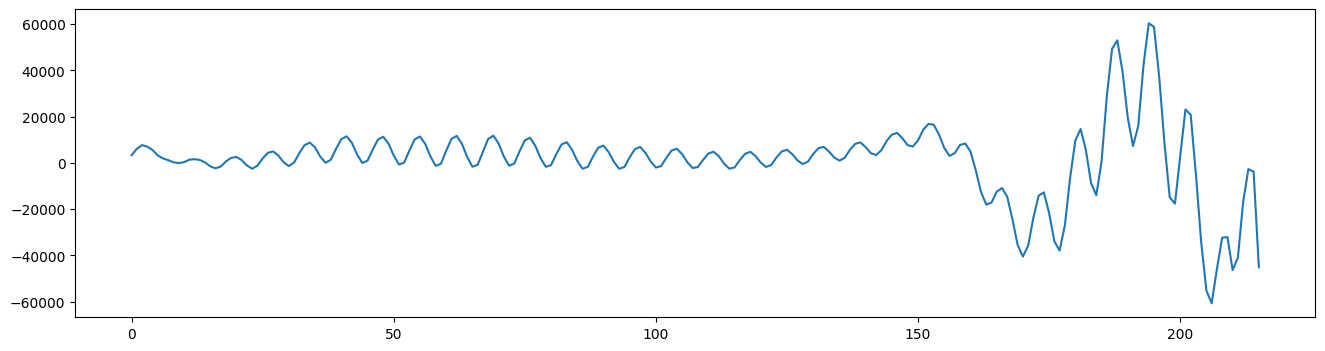

Компонента 39


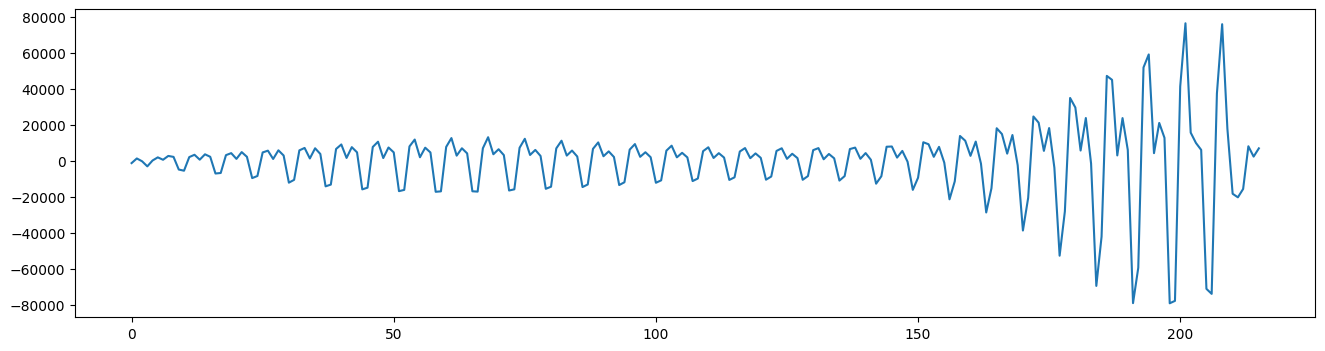

Компонента 40


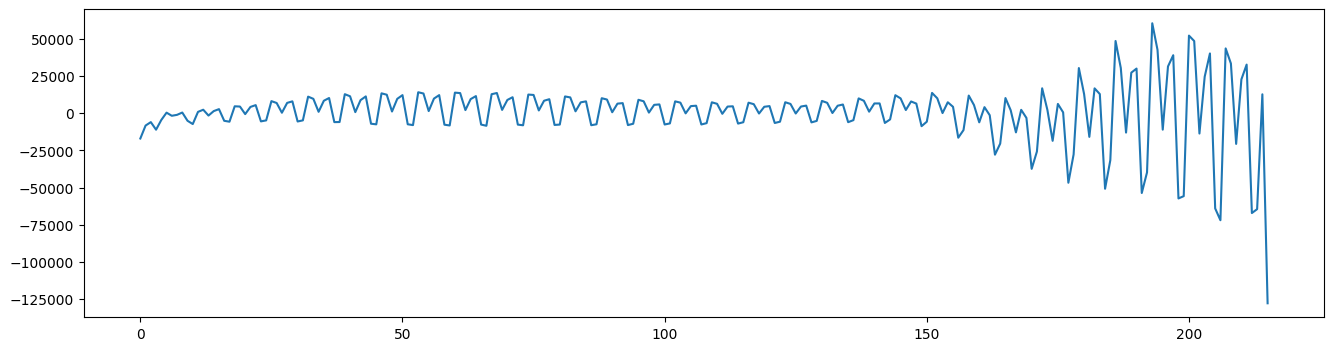

Компонента 41


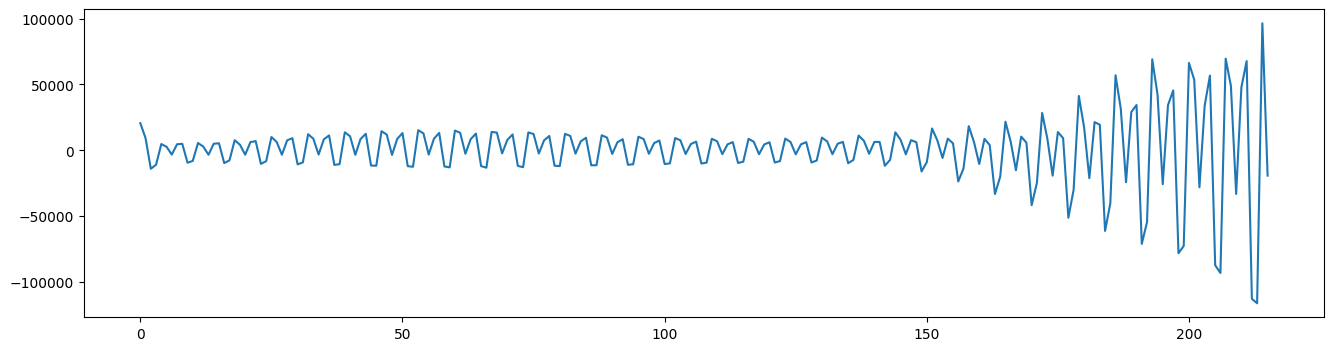

Компонента 42


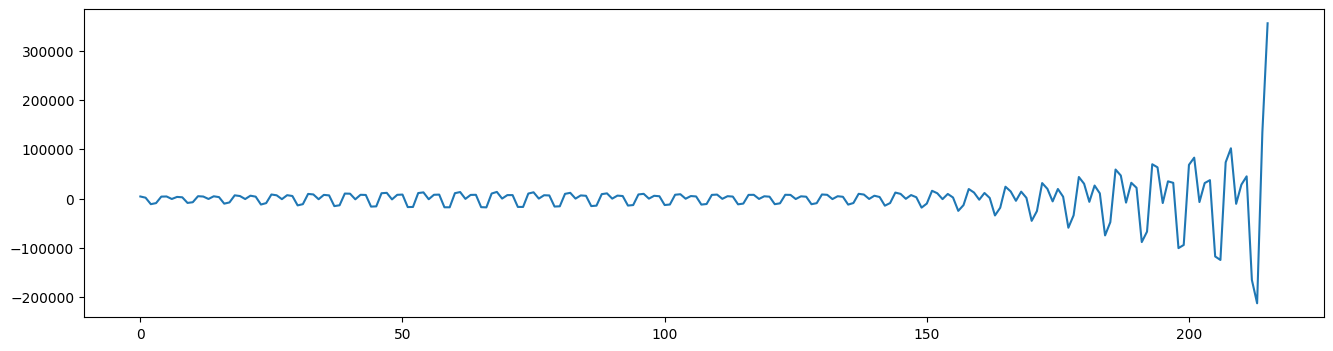

Компонента 43


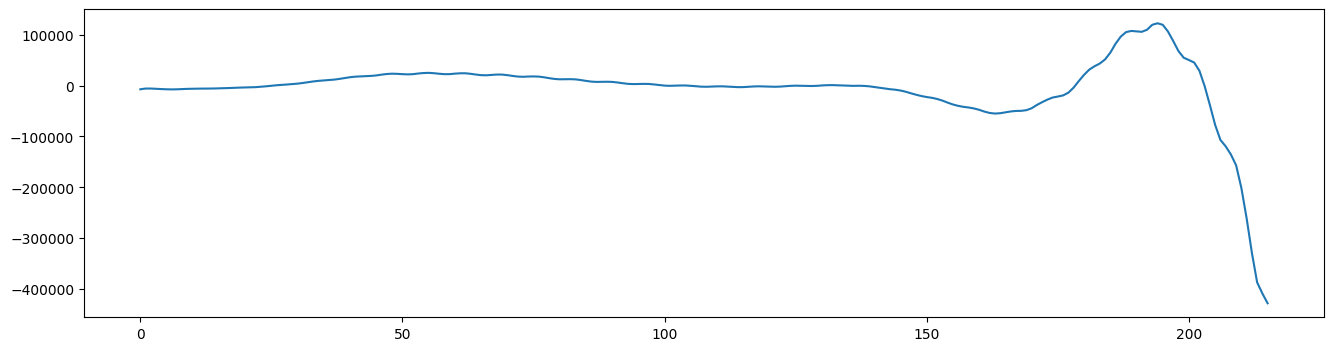

Компонента 44


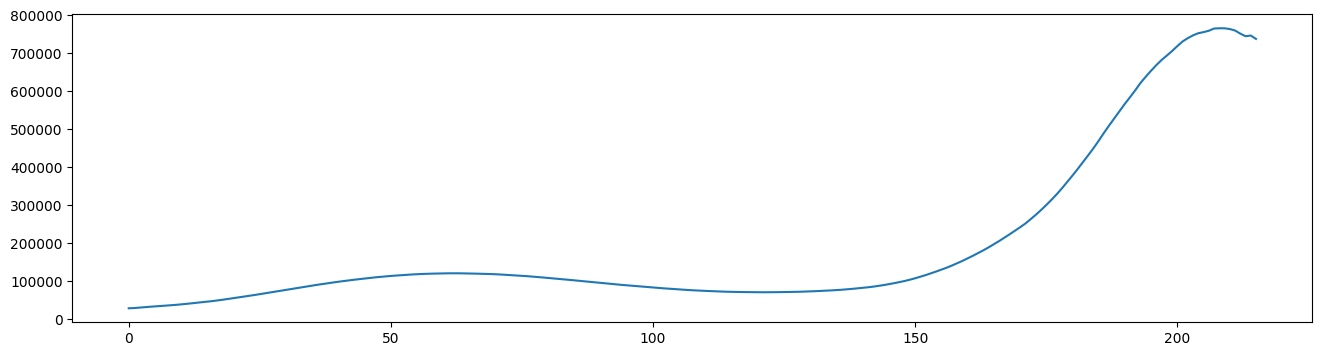

In [123]:
# разложим ряд на компоненты

component = main_components(arr_data)

for i in range(len(component)):
    print(f'Компонента {i}')
    plt.figure(figsize=(16, 4))
    plt.plot(component[i])
    plt.show()

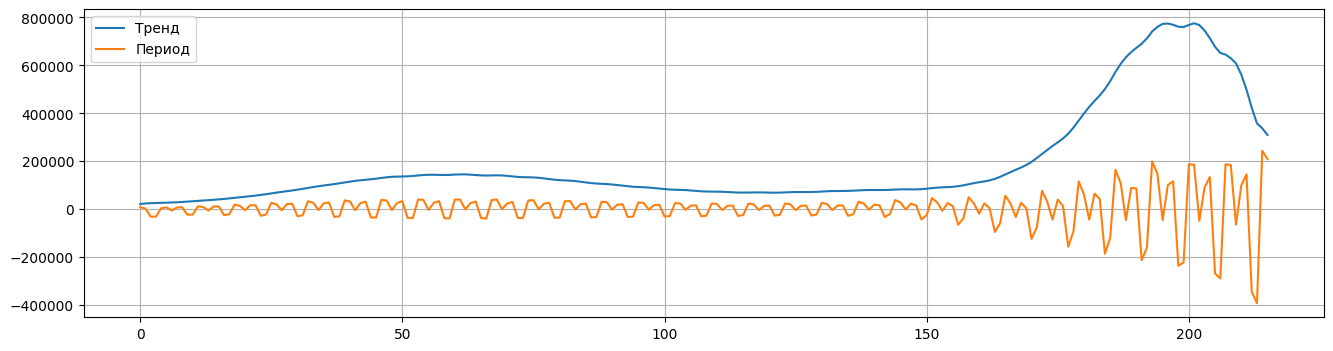

In [124]:
plt.figure(figsize=(16, 4))
# plt.plot(sum(component[-2:-1]))
plt.plot(sum(component[-2:]))
plt.plot(sum(component[-5:-2]))
plt.grid()
plt.legend(['Тренд', 'Период'])
plt.show()

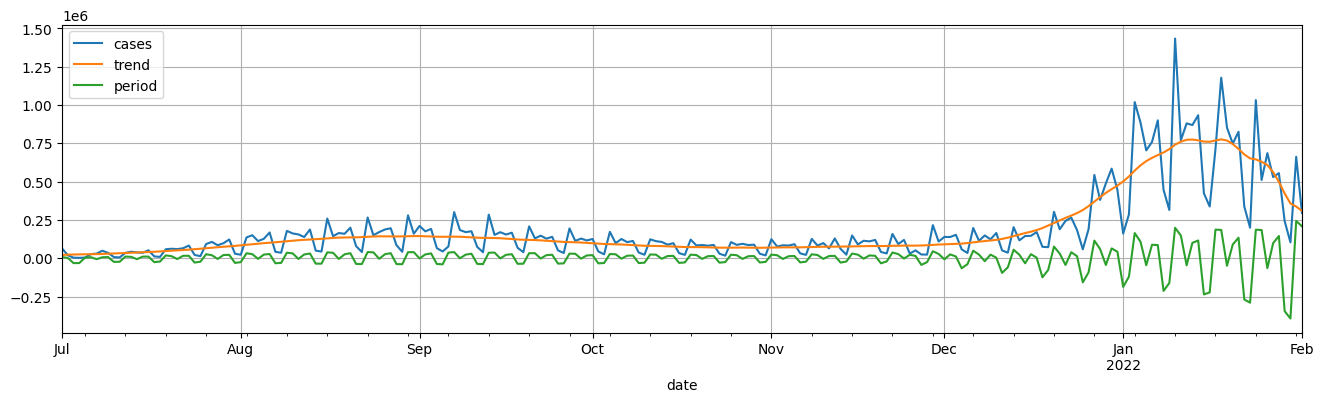

In [125]:
data_copy = data.copy()
data_copy['trend'] = sum(component[-2:])
data_copy['period'] = sum(component[-5:-2])

data_copy.plot(figsize=(16, 4), grid=True)
plt.show()

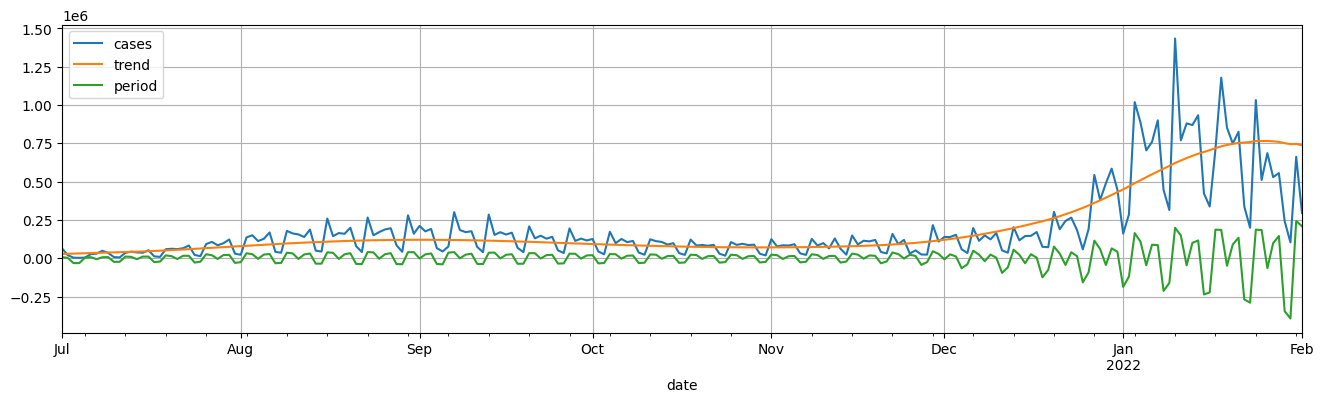

In [126]:
data_copy = data.copy()
data_copy['trend'] = component[-1]
data_copy['period'] = sum(component[-5:-2])

data_copy.plot(figsize=(16, 4), grid=True)
plt.show()

# Выводы
### Мы видим, что метод SSA очень неплохо применяется к временным рядам. Особенно после того, как мы ограничили ряд и сконцетрировались на определенных моментах, разбор на компоненты ряда улучшился и хоть мы не смогли взять много компонентов, визуально график не только показывает нам хороший тренд, который в целом отображает состояние данных, но и периодичность, которая хорошо показывает нам, как именно ведут с